In [1]:
class Agent:
    def __init__(self, x):
        self.x = x

def change_agent(agent):
    agent.x = 1


class Board:
    def __init__(self, agent):
        self.agent = agent

    def do_sth(self):
        change_agent(self.agent)
        


agent = Agent(None)
board = Board(agent)
board.do_sth()
print(agent.x)


1


In [3]:
# q_value that look like q_value[state][action] = value
q_value = {
    (1, 3, 1): {
        Action.UP: 0,
        Action.DOWN: 0,
    },
    (2, 3, 4): {
        Action.UP: 0,
        Action.DOWN: 0,
    }
}

for state in q_value:
    for action in q_value[state]:
        print(q_value[state][action])

0
0
0
0
0
0
0
0


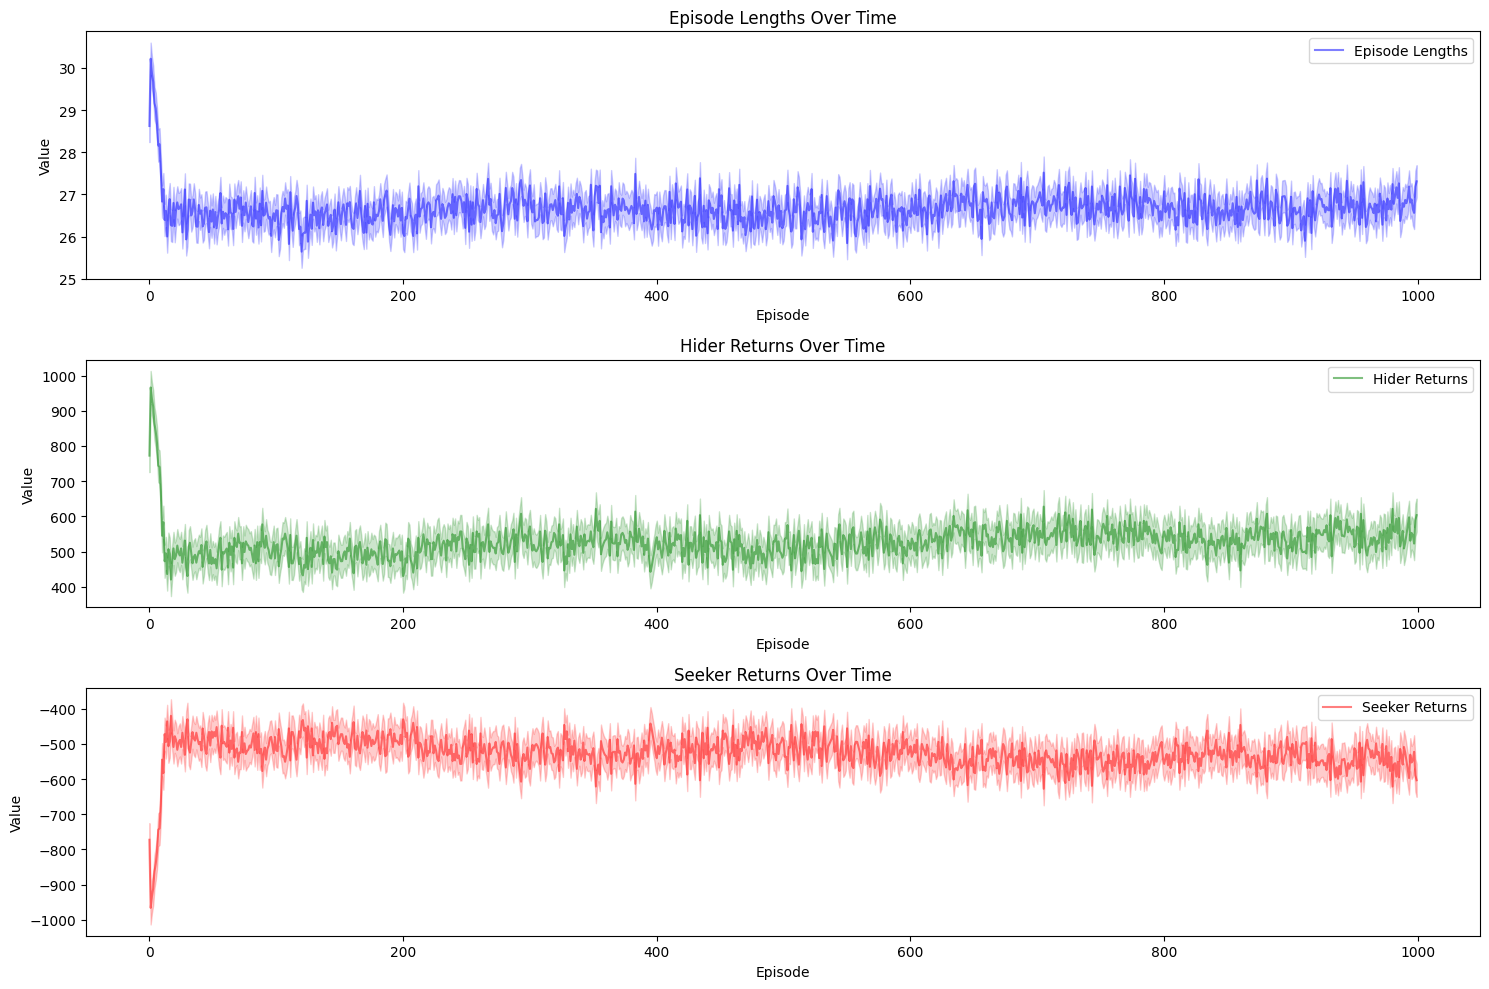

In [83]:
import matplotlib.pyplot as plt
import json
import numpy as np

with open("simulation_data.json", "r") as f:
    data = json.load(f)

def average_every_n_items(data, n):
    return [np.mean(data[i:i + n]) for i in range(0, len(data), n)]

def visualize_data(data) -> None:
    episode_lengths = data.get("episode_lengths", [])
    hider_returns = data.get("hider_returns", [])
    seeker_returns = data.get("seeker_returns", [])

    if not episode_lengths or not hider_returns or not seeker_returns:
        raise ValueError("Data is incomplete or missing.")

    episode_lengths_avg = average_every_n_items(episode_lengths, 1000)
    hider_returns_avg = average_every_n_items(hider_returns, 1000)
    seeker_returns_avg = average_every_n_items(seeker_returns, 1000)

    def plot_with_average(ax, data, title, color):
        episodes = range(len(data))
        std_dev = np.std(data)

        ax.plot(episodes, data, label=title, color=color, alpha=0.5)
        ax.fill_between(episodes, np.array(data) - std_dev, np.array(data) + std_dev, color=color, alpha=0.2)
        ax.set_xlabel('Episode')
        ax.set_ylabel('Value')
        ax.set_title(f'{title} Over Time')
        ax.legend()

    fig, axs = plt.subplots(3, 1, figsize=(15, 10))

    plot_with_average(axs[0], episode_lengths_avg, 'Episode Lengths', 'blue')
    plot_with_average(axs[1], hider_returns_avg, 'Hider Returns', 'green')
    plot_with_average(axs[2], seeker_returns_avg, 'Seeker Returns', 'red')

    plt.tight_layout()
    plt.show()

visualize_data(data)

In [65]:
float(0.9999 * 0.2 * 0.99999 ** 400_000) * 1

0.003662688210050624

In [108]:
# Import necessary libraries
import numpy as np
from unittest.mock import Mock

# Define the necessary classes and methods

class Action:
    UP = 'UP'
    DOWN = 'DOWN'
    LEFT = 'LEFT'
    RIGHT = 'RIGHT'

class State:
    pass

class Transition:
    def __init__(self, state, action, reward, next_state, is_terminal):
        self.state = state
        self.action = action
        self.reward = reward
        self.next_state = next_state
        self.is_terminal = is_terminal
    def __repr__(self):
        return f"Transition(state={self.state}, action={self.action}, reward={self.reward}, next_state={self.next_state}, is_terminal={self.is_terminal})"
from dataclasses import dataclass, field
@dataclass
class Trajectory:
    transitions: list[Transition] = field(default_factory=list)

    def add_transition(self, state: tuple, action: Action, reward: float, next_state: tuple, is_terminal: bool,) -> None:
        transition = Transition(state, action, reward, next_state, is_terminal)
        self.transitions.append(transition)

    def get_sub_trajectory(self, n: int) -> None:
        return Trajectory(self.transitions[-n:])
    
    def __len__(self) -> int:
        return len(self.transitions)
    
    def __getitem__(self, index: int | slice) -> None:
        return Trajectory(self.transitions[index])
    
    def __repr__(self) -> str:
        return f"Trajectory(transitions={self.transitions})"

class QLearning:
    def __init__(
        self,
        learning_rate: float,
        discount_factor: float,
        default_q_value: float = 0.0,
        n_steps: int = 1,
    ) -> None:
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.default_q_value = default_q_value
        self.n_steps = n_steps
        self.q_values = {}

    def update(self, trajectory: Trajectory) -> None:
        number_of_transitions = len(trajectory)
        is_terminal = trajectory.transitions[-1].is_terminal
        print(trajectory.transitions[-1])

        # If the trajectory is not long enough, do not update the Q-values
        if (
            number_of_transitions < self.n_steps 
            and not is_terminal
            ):  
            return None
        
        n_step_trajectory = trajectory.get_sub_trajectory(self.n_steps)
        print(n_step_trajectory)
        if is_terminal:
            for index, transition in enumerate(n_step_trajectory.transitions):
                print(n_step_trajectory[index:])
                self._update_q_values(n_step_trajectory[index:], is_terminal)
        else:
            self._update_q_values(n_step_trajectory, is_terminal)


    def _update_q_values(self, n_step_trajectory: Trajectory, is_terminal: bool) -> None:
        update_state = n_step_trajectory.transitions[0].state
        update_action = n_step_trajectory.transitions[0].action

        n_step_return = 0
        for i, transition in enumerate(n_step_trajectory.transitions):
            n_step_return += self.discount_factor ** i * transition.reward

        if not is_terminal:
            next_state = n_step_trajectory.transitions[-1].next_state
            max_q_value = max(
                self.q_values[next_state][action] for action in Action
            )
            n_step_return += self.discount_factor ** self.n_steps * max_q_value

        td_error = n_step_return - self.q_values[update_state][update_action]
        self.q_values[update_state][update_action] += self.learning_rate * td_error

# Create dummy data

state1 = 'state1'
state2 = 'state2'
state3 = 'state3'
state4 = 'state4'
action1 = Action.UP
action2 = Action.DOWN
action3 = Action.LEFT
action4 = Action.RIGHT

transition1 = Transition(state=state1, action=action1, reward=2, next_state=state2, is_terminal=False)
# transition2 = Transition(state=state2, action=action2, reward=2, next_state=state3, is_terminal=False)
# transition3 = Transition(state=state3, action=action3, reward=3, next_state=None, is_terminal=True)

# n_step_trajectory = Trajectory(transitions=[transition1, transition2, transition3])
n_step_trajectory = Trajectory(transitions=[transition1])

# Initialize QLearning instance
q_learning = QLearning(learning_rate=0.1, discount_factor=0.9, default_q_value=1.0, n_steps=1)

# Initialize Q-values
q_learning.q_values = {
    state1: {action1: 1.0},
    state2: {action2: 1.0},
    state3: {action3: 1.0}
    state4: {action4: 1.0}
}

# Test the _update_q_values method
print("Q-values before update:", q_learning.q_values)
q_learning.update(n_step_trajectory)
print("Q-values after update:", q_learning.q_values)

Q-values before update: {'state1': {'UP': 1.0}, 'state2': {'DOWN': 1.0}, 'state3': {'LEFT': 1.0}}
Transition(state=state1, action=UP, reward=2, next_state=state2, is_terminal=False)
Trajectory(transitions=[Transition(state=state1, action=UP, reward=2, next_state=state2, is_terminal=False)])


TypeError: 'type' object is not iterable